<font color="red" size=4px> KNearestNeighborsClassifiers For Iris Classification  </font>

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [116]:
iris = pd.read_csv('C:/Users/user/Desktop/Iris.csv')
iris = iris.iloc[:,1:]
iris.columns = [i.lower() for i in iris.columns]

In [117]:
print("Targer Feature Unique Value : ",iris['species'].unique())
iris.head(3)

Targer Feature Unique Value :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [118]:
iris['target'] = iris['species'].map({"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3})
iris.head(3)

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1


In [119]:
# drop species feature from our datasets . 
iris.drop(['species'],axis = 1,inplace = True)
iris.head(3)

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


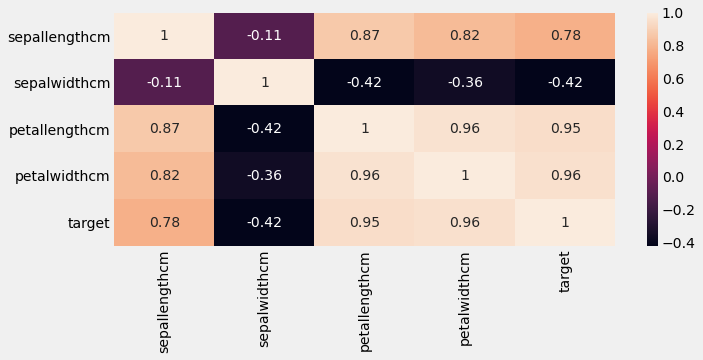

In [120]:
sns.heatmap(iris.corr(),annot = True)
plt.show()

# we can see there is high correlation between 
# 1 . target and sepallengthcm
# 2 . target and petallength
# 3 . target and petalwidth 

# I'll Use KNearestNeighbors for classifying samples  

In [121]:
x = iris.loc[:,iris.columns != "target"]
y = iris['target']

In [122]:
# import knnclassifier from sklearn .
from sklearn.neighbors import KNeighborsClassifier
# performing cross validation in order to avoid overfitting and underfitting  .
from sklearn.model_selection import cross_val_score
# classification matrices . 
from sklearn.metrics import f1_score,accuracy_score,log_loss
# for splitting train and test sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 43)

In [123]:
# n_neighbors or  k must be negative value . 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
ytrain_pred = knn.predict(xtrain)
ypred = knn.predict(xtest)
print("For Train Data Accuracy : ",accuracy_score(ytrain,ytrain_pred))
print("For Test  Data Accuracy : ",accuracy_score(ytest,ypred))

For Train Data Accuracy :  0.9428571428571428
For Test  Data Accuracy :  1.0


In [124]:
# Let's see null accuracy of our model to check whethet our model performing well or not  . 
ytest.value_counts()

2    17
1    15
3    13
Name: target, dtype: int64

In [125]:
# ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
# d = {"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3}
#total = 17+15+13
#Iris_setosa     = 15/total
#Iris_versicolor = 17/total
#Iris_virginica  = 13/total
#print("Iris_setosa : ",Iris_setosa)
#print("Iris_versicolor :",Iris_versicolor)
#print("Iris_virginica  : ",Iris_virginica)

# I'm going to apply KFoldCV to find optimal K - Value . 

In [126]:
x = iris.loc[:,iris.columns != "target"]
y = iris['target']

In [127]:
Accuracy_score = [] # for keep Tracking of Accuracy_score !
k_values = [i for i in range(5,30,2)] # as i mentioned earlier only odd values for K .

for i in k_values:
    knn = KNeighborsClassifier(i)
    score = cross_val_score(knn,x,y,scoring = "accuracy",cv = 10)
    Accuracy_score.append(score.mean())

## Let's Plot the Graph 
### accuracy_score v/s KValues 

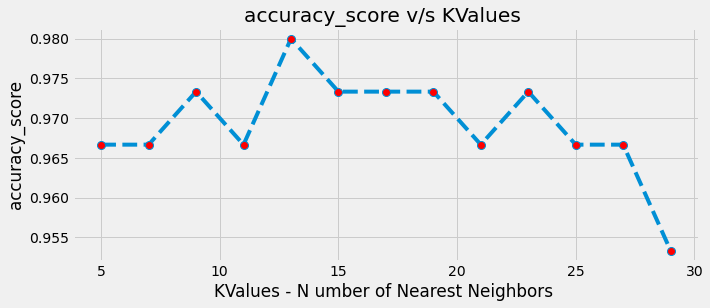

In [128]:
plt.rcParams['figure.figsize'] = (10,4)
plt.plot(range(5,30,2),Accuracy_score,linestyle = "dashed",marker = "o",markerfacecolor = "r",markersize=8 )
plt.title("accuracy_score v/s KValues ")
plt.xlabel("KValues - N umber of Nearest Neighbors ")
plt.ylabel("accuracy_score")
plt.show()

In [129]:
# from the above graph we can conclude that as k-value increase's accuracy increase's intially then it's decreasing completely  .
# note : accuracy is good when k =  13 ,so i'll use 13 as my Optimal K_value to Build Model .  

In [130]:
# n_neighbors or  k must be negative value . 
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(xtrain,ytrain)
ytrain_pred = knn.predict(xtrain)
ypred = knn.predict(xtest)
print("For Train Data Accuracy : ",accuracy_score(ytrain,ytrain_pred))
print("For Test  Data Accuracy : ",accuracy_score(ytest,ypred))
# Model is slightly over fitted for kvalue = 13 

For Train Data Accuracy :  0.9714285714285714
For Test  Data Accuracy :  0.9333333333333333


In [131]:
# when k = 14 
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(xtrain,ytrain)
ytrain_pred = knn.predict(xtrain)
ypred = knn.predict(xtest)
print("For Train Data Accuracy : ",accuracy_score(ytrain,ytrain_pred))
print("For Test  Data Accuracy : ",accuracy_score(ytest,ypred))
# Model is still  over fitted for kvalue = 14 

For Train Data Accuracy :  0.9714285714285714
For Test  Data Accuracy :  0.9333333333333333


In [132]:
# when k = 15 
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(xtrain,ytrain)
ytrain_pred = knn.predict(xtrain)
ypred = knn.predict(xtest)
print("Now it's Wow  : \n")
print("For Train Data Accuracy : ",accuracy_score(ytrain,ytrain_pred))
print("For Test  Data Accuracy : ",accuracy_score(ytest,ypred))


Now it's Wow  : 

For Train Data Accuracy :  0.9809523809523809
For Test  Data Accuracy :  0.9777777777777777
